<a href="https://colab.research.google.com/github/DonRoboto/Cursos/blob/master/Jorge_Calvillo_PerrosVsGatosChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clasificador de perros y gatos
En este ejercicio construirás un clasificador de imágenes de perros y gatos con redes neuronales convolucionales.

In [0]:
import numpy as np
import matplotlib.pyplot as plt

# Librerías para uso de imágenes

import cv2
import imutils
from keras.preprocessing import image as image_utils

# Librerías para modelos de redes neuronales artificiales con keras

from keras.models import Sequential
from keras import backend
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras import optimizers
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [0]:
# Con estas líneas de código podemos tener acceso a los documentos de nuestro Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


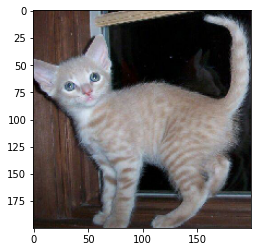

In [0]:
# Visualización de datos a trabajar.
# Es importante tener clara la ubicación de las imágenes
# La siguiente dirección considera que en tu Unidad de drive se encuentra una carpeta
# llamada PerrosGatos con las imágenes.
imagen = image_utils.load_img('/content/drive/My Drive/DogsCats/imgs/104.jpg', 
                             target_size = (200,200))
plt.imshow(imagen, cmap='Accent')
plt.show()

In [0]:
# Con la siguiente instrucción convertimos una imagen a arreglo de numpy
imagen = image_utils.img_to_array(imagen)
imagen.shape

(200, 200, 3)

## Preprocesamiento de los datos

In [0]:
# Construicción del dataset a partir de las imágenes de la carpeta perros y gatos
# El dataset será un tensor de 4 dimensiones: 
# la 1° dimensión indica el numero de imagen,
# la 2° dimensión indica el ancho de la imagen,
# la 3° dimensión indica el alto de la imagen,
# la 4° dimensión indica el numero de canales que es 3 en el formato RGB.
# Primero creamos la variable dataset de dimensión (400,200,200,3) con valores 0
n_imagenes = 400
alto = 200
ancho = 200
canales = 3

dataset = np.zeros((n_imagenes, ancho, alto, canales), dtype = np.float32)


In [0]:
# Ahora actualizamos el dataset con la información de cada imagen
for i in range (n_imagenes):                                  # recuerda que la cuenta es de 0 a 399
  nombre = '/content/drive/My Drive/DogsCats/imgs/'+str(i+1)+'.jpg'      # construimos el nombre de la imagen
  img = image_utils.load_img(nombre, target_size = (200,200)) # con el nombre, leemos la imagen
  img = image_utils.img_to_array(img)                         # convertimos la imagen a arreglo de numpy. Esta es una buena practica
  # Preprocesamiento
  # Aquí normalizamos la imagen antes de almacenarla en el dataset
  img /= 255
  dataset[i] = img                                            # Ingresamos la imagen en el lugar i del dataset 
  

In [0]:
# Visualización del dataset
dataset[0]

array([[[0.16078432, 0.26666668, 0.38431373],
        [0.14509805, 0.24705882, 0.3764706 ],
        [0.15686275, 0.25882354, 0.40392157],
        ...,
        [0.3254902 , 0.45882353, 0.84313726],
        [0.2784314 , 0.41568628, 0.7764706 ],
        [0.18431373, 0.32941177, 0.6745098 ]],

       [[0.17254902, 0.2784314 , 0.39607844],
        [0.14901961, 0.2509804 , 0.38039216],
        [0.12941177, 0.23137255, 0.3764706 ],
        ...,
        [0.33333334, 0.44705883, 0.8392157 ],
        [0.27450982, 0.40392157, 0.7764706 ],
        [0.1882353 , 0.32156864, 0.67058825]],

       [[0.17254902, 0.2784314 , 0.39607844],
        [0.11372549, 0.21568628, 0.34509805],
        [0.15686275, 0.25882354, 0.40392157],
        ...,
        [0.34901962, 0.44705883, 0.84313726],
        [0.3019608 , 0.40392157, 0.78431374],
        [0.20392157, 0.31764707, 0.6784314 ]],

       ...,

       [[0.69803923, 0.7137255 , 0.75686276],
        [0.7176471 , 0.73333335, 0.78039217],
        [0.72156864, 0

In [0]:
# Lectura de las etiquetas
# La siguiente instrucción considera que el archivo "etiquetasPG.txt" se encuentra directamente en tu Unidad de drive
l = open('/content/drive/My Drive/DogsCats/etiquetasPG.txt', 'r')           # Abrimos el archivo "etiquetasPG.txt"
etiquetas = list(map(lambda x:x[:-1], l.readlines()))     # Esta instrucción que parece "compleja" crea una lista llamada "etiquetas"  
                                                          # con las palabras que encuentra en el archivo "etiquetasPG.txt"
l.close()
print(etiquetas)

['perro', 'perro', 'perro', 'perro', 'gato', 'gato', 'gato', 'gato', 'gato', 'gato', 'gato', 'perro', 'gato', 'gato', 'gato', 'gato', 'perro', 'perro', 'gato', 'gato', 'perro', 'gato', 'perro', 'perro', 'gato', 'perro', 'perro', 'gato', 'gato', 'perro', 'perro', 'gato', 'perro', 'gato', 'gato', 'gato', 'gato', 'gato', 'perro', 'gato', 'perro', 'perro', 'perro', 'perro', 'gato', 'perro', 'gato', 'perro', 'perro', 'gato', 'gato', 'gato', 'gato', 'gato', 'gato', 'perro', 'perro', 'gato', 'perro', 'gato', 'gato', 'perro', 'gato', 'gato', 'perro', 'perro', 'perro', 'gato', 'perro', 'perro', 'perro', 'perro', 'perro', 'perro', 'gato', 'perro', 'perro', 'perro', 'perro', 'gato', 'gato', 'gato', 'perro', 'gato', 'perro', 'perro', 'perro', 'perro', 'gato', 'gato', 'gato', 'gato', 'gato', 'perro', 'perro', 'gato', 'perro', 'perro', 'gato', 'gato', 'gato', 'perro', 'gato', 'gato', 'perro', 'perro', 'gato', 'gato', 'perro', 'perro', 'perro', 'perro', 'perro', 'gato', 'gato', 'gato', 'gato', 'perro

In [0]:
# Construimos el arreglo de los targets por clase (0,1)
# Esto lo hacemos para convertir las palabras "perro" o "gato" en 1 y 0
targets = np.zeros(len(etiquetas))    # Creamos un arreglo de ceros
for i in range (len(etiquetas)):      # Recorremos todas las etiquetas
  if (etiquetas[i]=='perro'):         # Si la etiqueta dice "perro"
    targets[i] = 1                    # asignamos un 1 a los targets
  else:                               # Si la etiqueta No dice "perro"
    targets[i] = 0                    # asignamos un 0 a los targets

In [0]:
# Visualización de los targets
targets

array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 1.

In [0]:
# Aplicamos codificación 1-hot a las etiquetas
etiquetas2 = np_utils.to_categorical(targets) 
etiquetas2

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [0]:
# Dividimos los datos en entrenameinto y prueba
x_train, x_test, y_train, y_test = train_test_split(dataset, etiquetas2, 
                                                    test_size = 0.2)

In [0]:
# Estas son las dimensiones del conjunto de entrenamiento y el de prueba
print(x_train.shape)
print(x_test.shape)

(320, 200, 200, 3)
(80, 200, 200, 3)


## Diseño del modelo

In [0]:
# Resetea la sesión para cambiar el modelo. 
# Así eliminamos información previa del modelo.
backend.clear_session()

In [0]:
# Diseña la arquitectura del modelo con CNN

# EJERCICIO
# Prueba modificando los hiperparámetros del modelo y analiza los resultados 
model = Sequential()
model.add(Conv2D(16, strides=2, padding='same', kernel_size = 2, 
                 activation='relu', 
                 use_bias='true', input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(32,  padding='same', kernel_size = 2, activation='relu', 
                 use_bias='true'))
model.add(Conv2D(128,  padding='same', kernel_size = 2, activation='relu', 
                 use_bias='true'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64, padding='same', kernel_size = 2, activation='relu', 
                 use_bias='true'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Conv2D(32, padding='same', kernel_size = 2, activation='relu', 
                 use_bias='true'))
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Flatten())
model.add(Dense(128, use_bias='true', activation='relu'))
model.add(Dense(64, use_bias='true', activation='relu'))
model.add(Dense(32, use_bias='true', activation='relu'))
model.add(Dense(2, use_bias='true', activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 100, 100, 16)      208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       16512     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 25, 25, 128)      

## Entrenamiento del modelo

In [0]:
# Definimos el optimizador Adam, que es una variante de Gradiente Descendente
Adam = optimizers.Adam(lr = 0.0001, beta_1 = 0.9, beta_2 = 0.999, 
                       epsilon = 1e-08, decay =0.0) # Los parámetros que proponemos para beta_1, beta_2, epsilon y decay
                                                    # han probado dar buenos resultados en la práctica
# Compilamos el modelo
model.compile (loss = 'categorical_crossentropy', optimizer=Adam, metrics = ['accuracy'])

In [0]:
# Definimos el ModelCheckpoint para poder almacenar los pesos de la red
# Recuerda que la extensión del archivo para los pesos debe ser .h5
checkpoint = ModelCheckpoint(filepath='pesos.h5', monitor='val_loss', 
                             verbose=1, mode = 'min', 
                             save_best_only=True)

In [0]:
# Entrenamos el modelo
M = model.fit(x_train, y_train, epochs = 50, validation_data= (x_test, y_test), 
              verbose=True, shuffle=True, 
              batch_size=100, callbacks=[checkpoint])

Train on 320 samples, validate on 80 samples
Epoch 1/50
320/320 [==============================] - 1s 4ms/step - loss: 0.7036 - accuracy: 0.4750 - val_loss: 0.6944 - val_accuracy: 0.4875

Epoch 00001: val_loss improved from inf to 0.69437, saving model to pesos.h5
Epoch 2/50
320/320 [==============================] - 0s 703us/step - loss: 0.6908 - accuracy: 0.5375 - val_loss: 0.6947 - val_accuracy: 0.4875

Epoch 00002: val_loss did not improve from 0.69437
Epoch 3/50
320/320 [==============================] - 0s 706us/step - loss: 0.6917 - accuracy: 0.5094 - val_loss: 0.6944 - val_accuracy: 0.4875

Epoch 00003: val_loss did not improve from 0.69437
Epoch 4/50
320/320 [==============================] - 0s 728us/step - loss: 0.6902 - accuracy: 0.5156 - val_loss: 0.6939 - val_accuracy: 0.4875

Epoch 00004: val_loss improved from 0.69437 to 0.69390, saving model to pesos.h5
Epoch 5/50
320/320 [==============================] - 0s 704us/step - loss: 0.6895 - accuracy: 0.5375 - val_loss: 0.6

## Evaluación del modelo

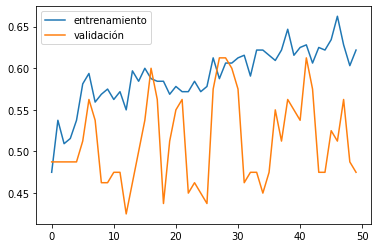

In [0]:
# Grafica la precisión del modelo (accuracy) 
plt.plot(M.history['accuracy'], label ='entrenamiento')
plt.plot(M.history['val_accuracy'], label ='validación')
plt.legend(loc='best')
plt.show()

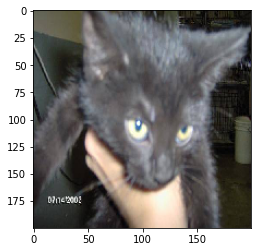

Clasificación dada por el modelo:  [[0.6302166  0.36978334]]
La imagen es de un gato


In [0]:
# Prueba del modelo sobre alguna imagen
imagenPrueba = x_test[15] # Seleccionamos una imagen del conjunto de prueba

# Predicción de la clase de la imagen 
clasificacion = model.predict(imagenPrueba.reshape(1,200,200,3))

# Resultados
plt.imshow(image_utils.array_to_img(imagenPrueba), cmap = 'Accent') # Mostramos la imágen
plt.show()

print('Clasificación dada por el modelo: ',clasificacion)

if (clasificacion[0,0]==0 and clasificacion[0,1]==1):
  print ('La imagen es de un perro')
else:
  print('La imagen es de un gato')